In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

In [2]:
game = pd.read_csv("video.csv")

In [3]:
game.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.95,3.77,8.45,82.53,76.0,51.0,8,321.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.67,12.75,3.79,3.28,35.50,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.92,3.28,2.95,32.76,80.0,73.0,8,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.79,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.42,6.94,4.70,2.24,28.31,87.0,80.0,8.4,593.0,Nintendo,E
6,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
7,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
8,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
9,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [4]:
na_game= game[(game.NA_Sales!=0)&(game.Year_of_Release!=2020)]

In [5]:
na_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 0 to 15847
Data columns (total 16 columns):
Name               11848 non-null object
Platform           11848 non-null object
Year_of_Release    11655 non-null float64
Genre              11848 non-null object
Publisher          11814 non-null object
NA_Sales           11848 non-null float64
EU_Sales           11848 non-null float64
JP_Sales           11848 non-null float64
Other_Sales        11848 non-null float64
Global_Sales       11848 non-null float64
Critic_Score       6095 non-null float64
Critic_Count       6095 non-null float64
User_Score         7350 non-null object
User_Count         5659 non-null float64
Developer          7354 non-null object
Rating             7332 non-null object
dtypes: float64(9), object(7)
memory usage: 1.5+ MB


In [6]:
na_game.Rating.value_counts()

E       3013
T       2113
M       1166
E10+    1031
EC         6
K-A        2
AO         1
Name: Rating, dtype: int64

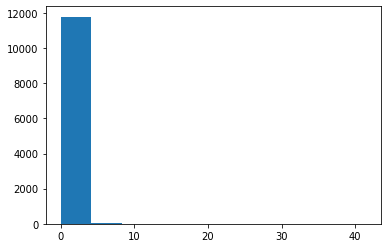

In [7]:
plt.figure()
plt.hist(na_game.NA_Sales)
plt.show()

In [8]:
na_game.NA_Sales.describe()

count    11848.000000
mean         0.335017
std          0.799586
min          0.010000
25%          0.060000
50%          0.130000
75%          0.330000
max         41.360000
Name: NA_Sales, dtype: float64

In [9]:
year_sale=na_game.groupby('Year_of_Release')[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().reset_index()
year_sale

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1992.0,1.24,1.61,0.00,0.10
1,1994.0,7.31,8.05,1.04,0.74
2,1995.0,16.32,12.12,4.48,1.90
3,1996.0,72.01,37.32,17.54,5.97
4,1997.0,92.66,47.40,24.12,7.98
5,1998.0,118.92,59.79,22.52,9.34
6,1999.0,109.85,52.71,23.66,7.84
7,2000.0,88.11,49.22,22.58,9.57
8,2001.0,171.25,91.77,24.94,21.85
9,2002.0,216.19,109.57,27.59,27.08


In [10]:
def color_NA(x):
    if x >=2015:
        return "red"
    else:
        return "darkgrey"
    
def color_EU(x):
    if x >=2015:
        return "blue"
    else:
        return "silver"

year_sale["color_NA"]= year_sale["Year_of_Release"].apply(color_NA)
year_sale["color_EU"]= year_sale["Year_of_Release"].apply(color_EU)
year_sale

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,color_NA,color_EU
0,1992.0,1.24,1.61,0.00,0.10,darkgrey,silver
1,1994.0,7.31,8.05,1.04,0.74,darkgrey,silver
2,1995.0,16.32,12.12,4.48,1.90,darkgrey,silver
3,1996.0,72.01,37.32,17.54,5.97,darkgrey,silver
4,1997.0,92.66,47.40,24.12,7.98,darkgrey,silver
5,1998.0,118.92,59.79,22.52,9.34,darkgrey,silver
6,1999.0,109.85,52.71,23.66,7.84,darkgrey,silver
7,2000.0,88.11,49.22,22.58,9.57,darkgrey,silver
8,2001.0,171.25,91.77,24.94,21.85,darkgrey,silver
9,2002.0,216.19,109.57,27.59,27.08,darkgrey,silver


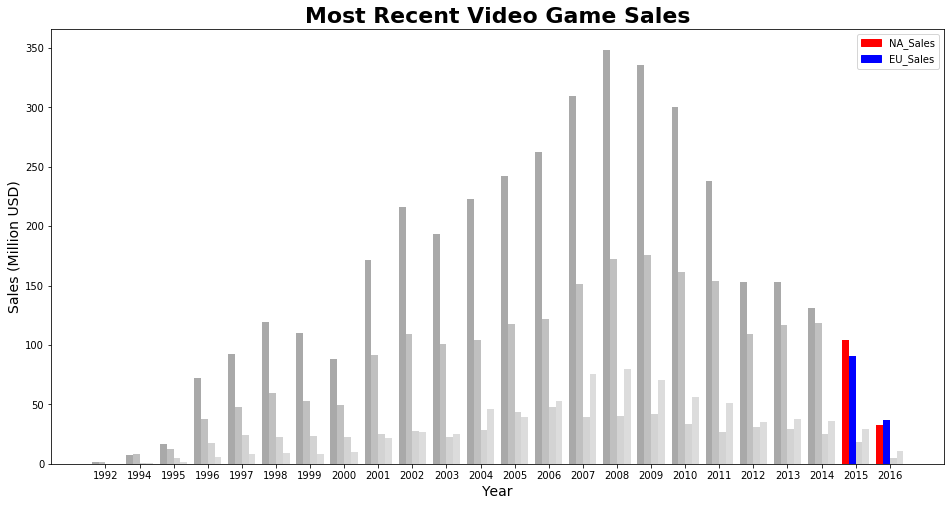

In [21]:
fig10=plt.figure(figsize=(16,8))
pos = np.arange(len(year_sale.Year_of_Release))

width = 0.2
plt.bar(pos-width*3/2,"NA_Sales",data=year_sale,width=width,color=year_sale.color_NA,label="NA_Sales")
plt.bar(pos-width*1/2,"EU_Sales",data=year_sale,width=width,color=year_sale.color_EU,label="EU_Sales")
plt.bar(pos+width*1/2,"JP_Sales",data=year_sale,width=width,color="lightgrey",label="JP_Sales")
plt.bar(pos+width*3/2,"Other_Sales",data=year_sale,width=width,color="gainsboro",label="Other_Sales")
ax =plt.gca()

ax.set_xticks(np.arange(len(year_sale.Year_of_Release)))
ax.set_xticklabels(year_sale.Year_of_Release.astype(np.int64))
leg = ax.get_legend()
red_patch = mpatches.Patch(color='red', label='NA_Sales')
blue_patch =mpatches.Patch(color='blue',label="EU_Sales")

plt.legend(handles=[red_patch,blue_patch])
plt.title("Most Recent Video Game Sales", fontsize=22, weight="bold")
plt.ylabel("Sales (Million USD)", fontsize=14)
plt.xlabel("Year", fontsize=14)
fig10.savefig('C:/Users/user/Desktop/python/recent_sales.png')
plt.show()

In [12]:
genre_sale=na_game.groupby('Genre')[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().reset_index()
genre_sale= genre_sale.sort_values("NA_Sales",ascending=False)
genre_sale

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,821.58,496.80,93.98,180.97
10,Sports,663.94,354.23,49.58,129.81
8,Shooter,530.72,303.40,22.62,101.19
3,Misc,395.40,189.40,41.00,66.96
6,Racing,343.89,225.71,37.71,73.46
4,Platform,305.05,162.78,59.53,44.41
7,Role-Playing,294.18,159.44,183.97,51.64
2,Fighting,205.20,94.32,39.11,34.88
9,Simulation,179.85,105.02,36.47,28.78
1,Adventure,92.11,55.08,10.62,15.05


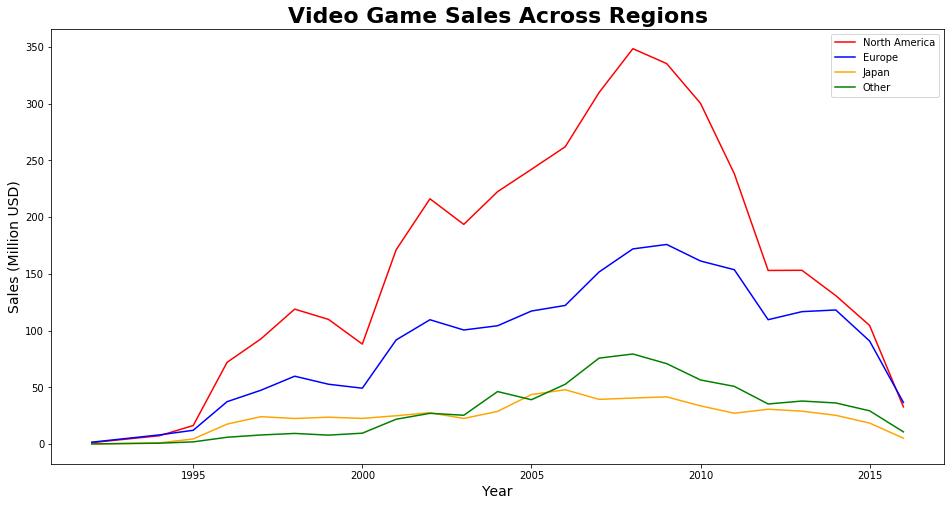

In [19]:
fig=plt.figure(figsize=(16,8))
plt.plot("Year_of_Release","NA_Sales",data=year_sale,color='red',label="North America")
plt.plot("Year_of_Release","EU_Sales",data=year_sale,color='blue',label="Europe")
plt.plot("Year_of_Release","JP_Sales",data=year_sale,color='orange',label="Japan")
plt.plot("Year_of_Release","Other_Sales",data=year_sale,color='green',label="Other")
plt.title("Video Game Sales Across Regions", fontsize=22, weight="bold")
plt.ylabel("Sales (Million USD)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.legend()
plt.show()
fig.savefig('C:/Users/user/Desktop/python/region_sales.png')

In [13]:
genre_info = na_game.groupby("Genre").NA_Sales.agg({'Number_of_Game':'count','Avg_sales':'mean',"Total_sales":"sum"})
genre_info.sort_values('Avg_sales',ascending=False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Number_of_Game,Avg_sales,Total_sales
Genre,,,
Shooter,1130,0.469664,530.72
Platform,740,0.412230,305.05
Sports,1824,0.364002,663.94
Fighting,581,0.353184,205.20
Role-Playing,854,0.344473,294.18
Misc,1201,0.329226,395.40
Action,2512,0.327062,821.58
Racing,1090,0.315495,343.89
Simulation,618,0.291019,179.85


In [14]:
genre_info['Avg_sales']=genre_info['Avg_sales']*1000
genre_info

,Number_of_Game,Avg_sales,Total_sales
Genre,,,
Action,2512,327.062102,821.58
Adventure,542,169.944649,92.11
Fighting,581,353.184165,205.20
Misc,1201,329.225645,395.40
Platform,740,412.229730,305.05
Puzzle,417,169.472422,70.67
Racing,1090,315.495413,343.89
Role-Playing,854,344.473068,294.18
Shooter,1130,469.663717,530.72


In [15]:
genre=na_game.groupby("Genre").NA_Sales.sum().reset_index().sort_values('NA_Sales',ascending=False)
genre=genre.reset_index().drop("index",axis=1)
genre

,Genre,NA_Sales
0,Action,821.58
1,Sports,663.94
2,Shooter,530.72
3,Misc,395.40
4,Racing,343.89
5,Platform,305.05
6,Role-Playing,294.18
7,Fighting,205.20
8,Simulation,179.85
9,Adventure,92.11


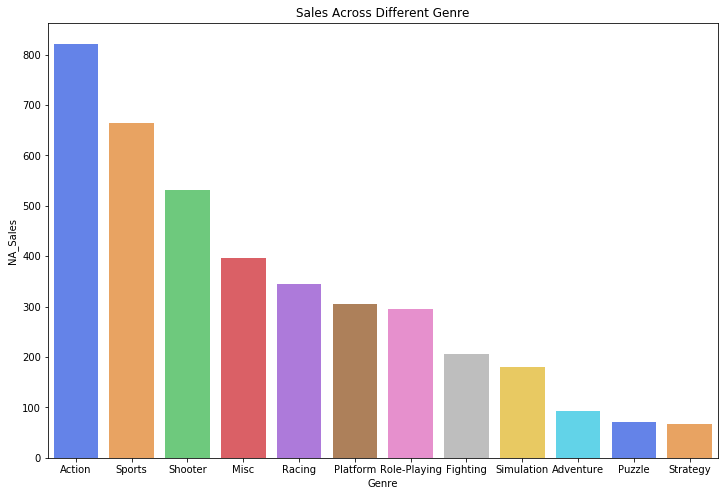

In [43]:
fig2=plt.figure(figsize=(12,8))
sns.barplot(genre.Genre,genre.NA_Sales, palette="bright",alpha=0.7)
plt.title("Sales Across Different Genre")
fig2.savefig('C:/Users/user/Desktop/python/genre_sales.png')

plt.show()

In [17]:
def bar_color(x):
    if x == "Action":
        return "blue"
    elif x == "Sports":
        return "orange"
    elif x=="Shooter":
        return "limegreen"
    else :
        return "darkgrey"

genre['color']=genre.Genre.apply(bar_color)
genre

,Genre,NA_Sales,color
0,Action,821.58,blue
1,Sports,663.94,orange
2,Shooter,530.72,limegreen
3,Misc,395.40,darkgrey
4,Racing,343.89,darkgrey
5,Platform,305.05,darkgrey
6,Role-Playing,294.18,darkgrey
7,Fighting,205.20,darkgrey
8,Simulation,179.85,darkgrey
9,Adventure,92.11,darkgrey


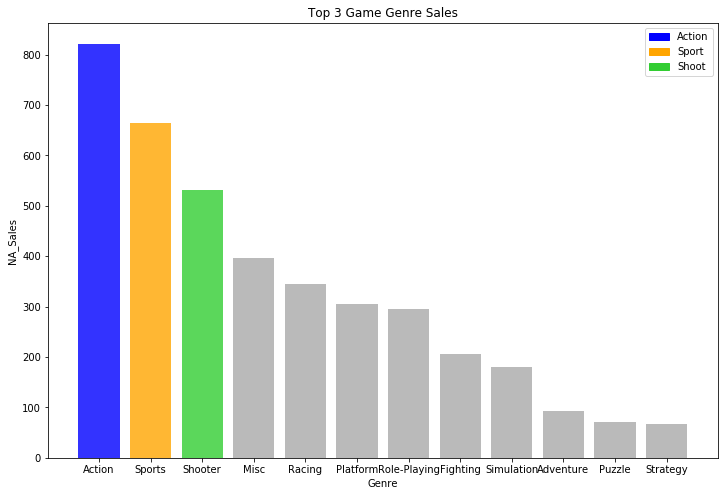

In [20]:
fig3=plt.figure(figsize=(12,8))
plt.bar(genre.Genre,genre.NA_Sales, color=genre.color,alpha=0.8)
plt.xlabel('Genre')
plt.ylabel("NA_Sales")
plt.title("Top 3 Game Genre Sales")
blue_patch = mpatches.Patch(color='blue', label='Action')
green_patch = mpatches.Patch(color='limegreen', label='Shoot')
lightgrey_patch=mpatches.Patch(color='orange',label="Sport")
plt.legend(handles=[blue_patch,lightgrey_patch,green_patch])
fig3.savefig('C:/Users/user/Desktop/python/genre_top3_sales.png')
plt.show()

In [21]:
sport =na_game[na_game.Genre=="Sports"]
shoot =na_game[na_game.Genre=="Shooter"]
action =na_game[na_game.Genre=="Action"]
fight =na_game[na_game.Genre=="Fighting"]
misc = na_game[na_game.Genre=="Misc"]
platform=na_game[na_game.Genre=="Platform"]
race = na_game[na_game.Genre=="Racing"]
role = na_game[na_game.Genre=="Role-Playing"]
simul = na_game[na_game.Genre=="Simulation"]

In [22]:
sport_yearly = sport.groupby('Year_of_Release').NA_Sales.sum().reset_index()
shoot_yearly =shoot.groupby('Year_of_Release').NA_Sales.sum().reset_index()
action_yearly = action.groupby('Year_of_Release').NA_Sales.sum().reset_index()

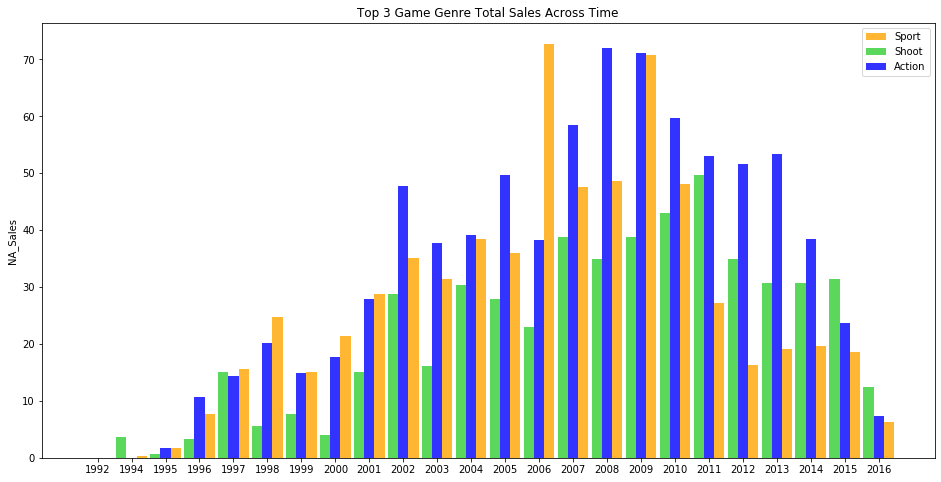

In [37]:
fig4=plt.figure(figsize=(16,8))
pos1 = np.arange(len(sport_yearly.Year_of_Release))
pos2= np.arange(len(shoot_yearly.Year_of_Release))
pos3= np.arange(len(action_yearly.Year_of_Release))
width = 0.3
plt.bar(pos1+1+width,"NA_Sales",data=sport_yearly,width=width,color='orange',label="Sport",alpha=0.8)
plt.bar(pos2-width,"NA_Sales",data=shoot_yearly,width=width,color='limegreen',label="Shoot",alpha=0.8)
plt.bar(pos3+2,"NA_Sales",data=action_yearly,width=width,color='blue',label="Action",alpha=0.8)

ax =plt.gca()

ax.set_xticks(np.arange(len(shoot_yearly.Year_of_Release)))
ax.set_xticklabels(shoot_yearly.Year_of_Release.astype(np.int64))

plt.ylabel("NA_Sales")
plt.title("Top 3 Game Genre Total Sales Across Time")
plt.legend()
fig4.savefig('C:/Users/user/Desktop/python/top3_sales_yearly.png')
plt.show()

In [24]:
def color_green(x):
    if x >=2013:
        return "limegreen"
    else:
        return "silver"

def color_blue(x):
    if x >=2013:
        return "blue"
    else:
        return "gainsboro"

color_blue(2015)

'blue'

In [25]:
action_yearly['color']=action_yearly['Year_of_Release'].apply(color_blue)

In [26]:
shoot_yearly['color']=shoot_yearly['Year_of_Release'].apply(color_green)

In [27]:
import matplotlib.patches as mpatches

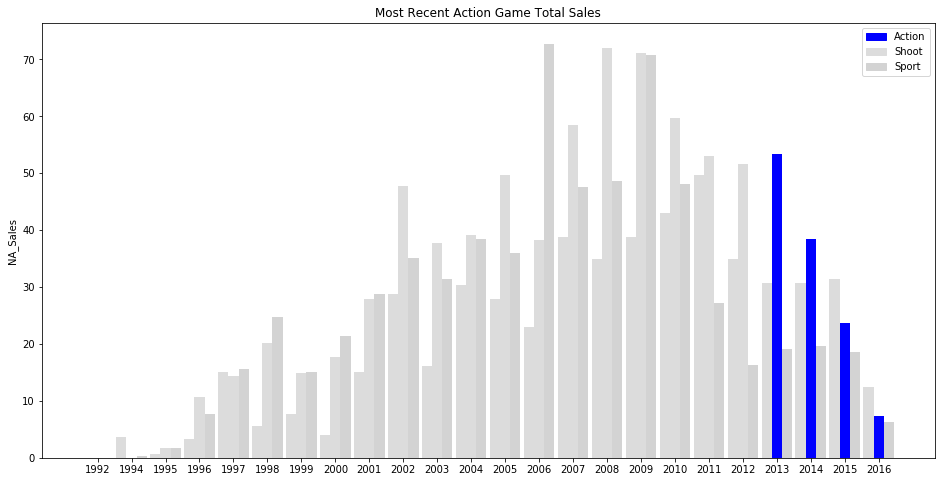

In [36]:
fig5=plt.figure(figsize=(16,8))
pos1 = np.arange(len(sport_yearly.Year_of_Release))
pos2= np.arange(len(shoot_yearly.Year_of_Release))
pos3= np.arange(len(action_yearly.Year_of_Release))
width = 0.3
plt.bar(pos1+1+width,"NA_Sales",data=sport_yearly,width=width,color='lightgrey',label="Sport")
plt.bar(pos2-width,"NA_Sales",data=shoot_yearly,width=width,color='gainsboro',label="Shoot")
plt.bar(pos3+2,"NA_Sales",data=action_yearly,width=width,color=action_yearly.color,label="Action")

ax =plt.gca()

ax.set_xticks(np.arange(len(shoot_yearly.Year_of_Release)))
ax.set_xticklabels(shoot_yearly.Year_of_Release.astype(np.int64))
leg = ax.get_legend()
blue_patch = mpatches.Patch(color='blue', label='Action')
gainsboro_patch =mpatches.Patch(color='gainsboro',label="Shoot")
lightgrey_patch=mpatches.Patch(color='lightgrey',label="Sport")
plt.legend(handles=[blue_patch,gainsboro_patch,lightgrey_patch])
plt.title("Most Recent Action Game Total Sales")
plt.ylabel("NA_Sales")
fig5.savefig('C:/Users/user/Desktop/python/top3_sales_recent.png')
plt.show()

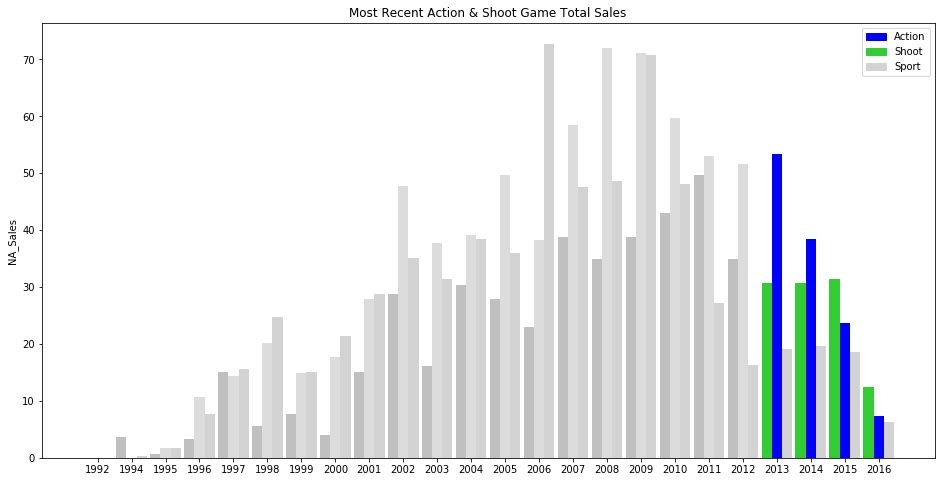

In [35]:
fig6=plt.figure(figsize=(16,8))
pos1 = np.arange(len(sport_yearly.Year_of_Release))
pos2= np.arange(len(shoot_yearly.Year_of_Release))
pos3= np.arange(len(action_yearly.Year_of_Release))
width = 0.3
plt.bar(pos1+1+width,"NA_Sales",data=sport_yearly,width=width,color='lightgrey',label="Sport")
plt.bar(pos2-width,"NA_Sales",data=shoot_yearly,width=width,color=shoot_yearly.color,label="Shoot")
plt.bar(pos3+2,"NA_Sales",data=action_yearly,width=width,color=action_yearly.color,label="Action")

ax =plt.gca()

ax.set_xticks(np.arange(len(shoot_yearly.Year_of_Release)))
ax.set_xticklabels(shoot_yearly.Year_of_Release.astype(np.int64))

blue_patch = mpatches.Patch(color='blue', label='Action')
green_patch = mpatches.Patch(color='limegreen', label='Shoot')
lightgrey_patch=mpatches.Patch(color='lightgrey',label="Sport")
plt.legend(handles=[blue_patch,green_patch,lightgrey_patch])
plt.title("Most Recent Action & Shoot Game Total Sales")
plt.ylabel("NA_Sales")
fig6.savefig('C:/Users/user/Desktop/python/top3_sales_recent_2.png')
plt.show()

In [29]:
#data check
pos1
pos2
pos3
sport_yearly.Year_of_Release.unique()
shoot_yearly.Year_of_Release.unique()
action_yearly.Year_of_Release.unique()
sport_yearly[sport_yearly.Year_of_Release==2016]
shoot_yearly[shoot_yearly.Year_of_Release==1992]
action_yearly[action_yearly.Year_of_Release==2016]

,Year_of_Release,NA_Sales,color
21,2016.0,7.27,blue


In [31]:
shoot.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
21,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.22,0.13,1.32,14.71,88.0,81.0,3.4,8711.0,"Infinity Ward, Sledgehammer Games",M
22,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.68,3.67,0.11,1.13,14.58,87.0,89.0,6.3,1452.0,Treyarch,M
23,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.94,5.84,0.35,2.35,14.48,NaN,NaN,NaN,NaN,NaN,NaN
25,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,919.0,Treyarch,M
26,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.23,0.07,1.11,13.66,83.0,73.0,4.8,2253.0,Treyarch,M


In [32]:
shoot.Platform.unique()

array(['X360', 'PS4', 'PS3', 'XB', 'N64', 'XOne', 'PS2', 'Wii', 'WiiU',
       'PC', 'PS', 'GC', 'PSP', 'PSV', 'DS', '3DS', 'GBA'], dtype=object)

In [33]:
sport_avg = sport.groupby('Year_of_Release').NA_Sales.mean().reset_index()
shoot_avg =shoot.groupby('Year_of_Release').NA_Sales.mean().reset_index()
action_avg = action.groupby('Year_of_Release').NA_Sales.mean().reset_index()

sport_avg

,Year_of_Release,NA_Sales
0,1994.0,0.180000
1,1995.0,0.153636
2,1996.0,0.204737
3,1997.0,0.444286
4,1998.0,0.449091
5,1999.0,0.335333
6,2000.0,0.368103
7,2001.0,0.334884
8,2002.0,0.208107
9,2003.0,0.275877


In [33]:
sport_avg['NA_Sales'] = sport_avg['NA_Sales']*1000
shoot_avg['NA_Sales'] = shoot_avg['NA_Sales']*1000
action_avg['NA_Sales'] = action_avg['NA_Sales']*1000
action_avg

,Year_of_Release,NA_Sales
0,1995.0,422.500000
1,1996.0,560.526316
2,1997.0,533.333333
3,1998.0,491.463415
4,1999.0,402.972973
5,2000.0,433.902439
6,2001.0,458.196721
7,2002.0,415.739130
8,2003.0,273.478261
9,2004.0,325.666667


In [34]:
shoot_avg['color'] = shoot_avg['Year_of_Release'].apply(color_green)
action_avg['color'] = action_avg['Year_of_Release'].apply(color_blue)
action_avg

,Year_of_Release,NA_Sales,color
0,1995.0,0.422500,gainsboro
1,1996.0,0.560526,gainsboro
2,1997.0,0.533333,gainsboro
3,1998.0,0.491463,gainsboro
4,1999.0,0.402973,gainsboro
5,2000.0,0.433902,gainsboro
6,2001.0,0.458197,gainsboro
7,2002.0,0.415739,gainsboro
8,2003.0,0.273478,gainsboro
9,2004.0,0.325667,gainsboro


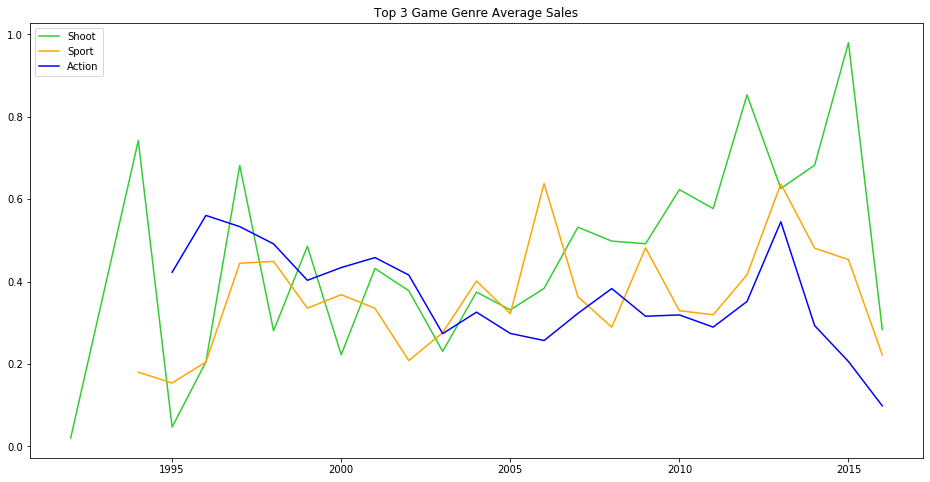

In [44]:
fig7=plt.figure(figsize=(16,8))
plt.plot("Year_of_Release","NA_Sales",data=shoot_avg,color="limegreen",label="Shoot")
plt.plot("Year_of_Release","NA_Sales",data=sport_avg,color="orange",label="Sport")
plt.plot("Year_of_Release","NA_Sales",data=action_avg,color="blue",label="Action")

plt.title("Top 3 Game Genre Average Sales")
plt.legend()
fig7.savefig('C:/Users/user/Desktop/python/top3_sales_avg.png')
plt.show()

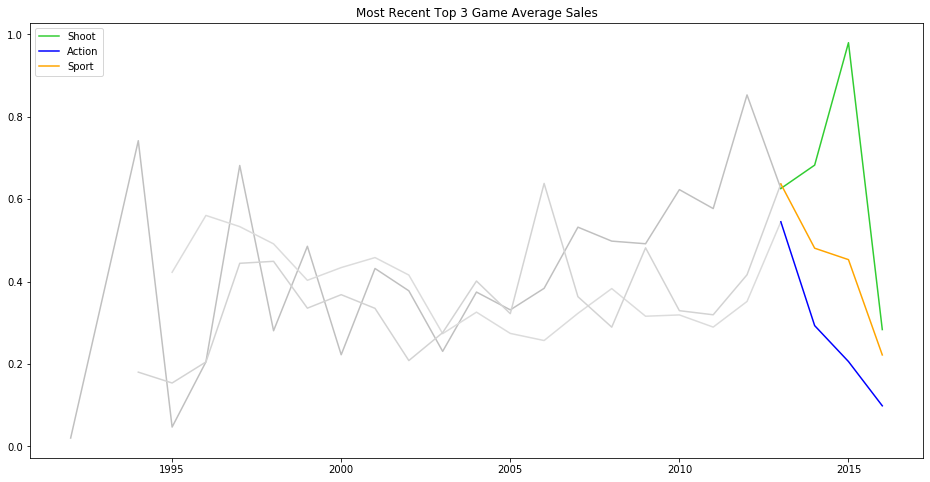

In [47]:
fig8=plt.figure(figsize=(16,8))

plt.plot("Year_of_Release","NA_Sales",data=shoot_avg[shoot_avg.Year_of_Release<=2013],color="silver",label='_nolegend_')
plt.plot("Year_of_Release","NA_Sales",data=action_avg[action_avg.Year_of_Release<=2013],color="gainsboro",label='_nolegend_')
plt.plot("Year_of_Release","NA_Sales",data=sport_avg[sport_avg.Year_of_Release<=2013],color="lightgrey",label='_nolegend_')
plt.plot("Year_of_Release","NA_Sales",data=shoot_avg[shoot_avg.Year_of_Release>=2013],color="limegreen",label="Shoot")
plt.plot("Year_of_Release","NA_Sales",data=action_avg[action_avg.Year_of_Release>=2013],color="blue",label="Action")
plt.plot("Year_of_Release","NA_Sales",data=sport_avg[sport_avg.Year_of_Release>=2013],color="orange",label="Sport")
##blue_patch = mpatches.Patch(color='blue', label='Action')
#green_patch = mpatches.Patch(color='limegreen', label='Shoot')
#lightgrey_patch=mpatches.Patch(color='orange',label="Sport")
#plt.legend(handles=[green_patch,lightgrey_patch,blue_patch])
plt.legend()
plt.title("Most Recent Top 3 Game Average Sales")
fig8.savefig('C:/Users/user/Desktop/python/top3_sales_avg_recent.png')
plt.show()

In [40]:
shoot_info =shoot.groupby('Platform').NA_Sales.agg({'Number_of_Game':'count','Avg_sales':'mean',"Total_sales":"sum"})

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [41]:
shoot_info=shoot_info.sort_values('Avg_sales',ascending=False).reset_index()
shoot_info

,Platform,Number_of_Game,Avg_sales,Total_sales
0,X360,183,0.952568,174.32
1,XOne,38,0.914211,34.74
2,PS4,39,0.783590,30.56
3,N64,22,0.634545,13.96
4,PS3,150,0.546467,81.97
5,PS2,148,0.388716,57.53
6,XB,132,0.349697,46.16
7,PSP,34,0.301765,10.26
8,PSV,5,0.296000,1.48
9,WiiU,8,0.290000,2.32


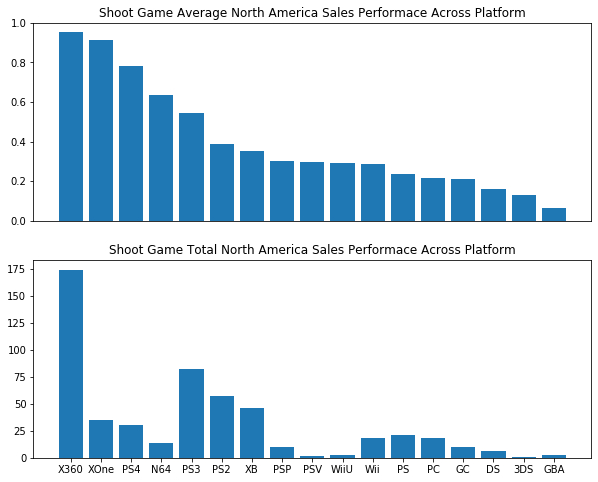

In [48]:
fig9= plt.figure(figsize=(10,8))

grid = plt.GridSpec(4,4, wspace=0.4, hspace=0.5)

ax_top=fig9.add_subplot(grid[0:2,0:4])
ax_bottom=fig9.add_subplot(grid[2:4,0:4])

ax_top.bar(shoot_info.Platform,shoot_info.Avg_sales)
ax_bottom.bar(shoot_info.Platform,shoot_info.Total_sales)

ax_top.set(xticks=[],xlabel='')
ax_top.set(title="Shoot Game Average North America Sales Performace Across Platform")
ax_bottom.set(title="Shoot Game Total North America Sales Performace Across Platform")

fig9.savefig('C:/Users/user/Desktop/python/shoot_platform_info.png')

plt.show()

In [54]:
plt.figure(figsize=(16,8))

grid = plt.GridSpec(4,4, wspace=0.4, hspace=0.5)

ax_top = fig.add_subplot(grid[0:2,0:-1]) #-1 
ax_bottom =fig.add_subplot(grid[2:4,0:-1])

ax_top.bar(shoot_info.Platform,shoot_info.Total_sales)

plt.show()

<Figure size 1152x576 with 0 Axes>

In [260]:
game_recc = shoot[shoot.Platform=="X360"]

In [264]:
game_recc.Critic_Score.describe()

count    130.000000
mean      72.238462
std       16.058422
min       28.000000
25%       63.250000
50%       76.000000
75%       84.000000
max       96.000000
Name: Critic_Score, dtype: float64

In [276]:
game_recc[game_recc.User_Score!= "tbd"].User_Score.astype(str).astype(float).describe()

count    140.000000
mean       6.855714
std        1.411427
min        1.200000
25%        6.100000
50%        7.200000
75%        7.800000
max        8.900000
Name: User_Score, dtype: float64

In [278]:
game_recc

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
21,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.22,0.13,1.32,14.71,88.0,81.0,3.4,8711.0,"Infinity Ward, Sledgehammer Games",M
22,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.68,3.67,0.11,1.13,14.58,87.0,89.0,6.3,1452.0,Treyarch,M
26,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.23,0.07,1.11,13.66,83.0,73.0,4.8,2253.0,Treyarch,M
27,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.58,0.08,1.28,13.46,94.0,100.0,6.3,2694.0,Infinity Ward,M
35,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7.97,2.81,0.13,1.21,12.12,94.0,86.0,7.8,4095.0,"Bungie Software, Bungie",M
49,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.55,0.04,0.91,10.23,73.0,29.0,2.6,2115.0,Infinity Ward,M
52,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.04,1.94,0.08,0.79,9.84,91.0,99.0,7.9,2043.0,Bungie,M
55,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.28,0.04,0.73,9.69,87.0,87.0,7.0,3256.0,343 Industries,M
59,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.92,2.35,0.13,0.90,9.29,94.0,70.0,8.4,1314.0,Infinity Ward,M
84,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.80,1.87,0.00,0.69,7.36,84.0,84.0,7.6,578.0,Treyarch,M
